In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [2]:
df['target'] = digits.target

In [6]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors':range(1,10),
    'algorithm':['auto','ball_tree']
},cv=5,return_train_score=False)
clf.fit(digits.data,digits.target)
clf.best_score_

0.9671711544413494

In [7]:
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 2}

In [9]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [11]:
knn.score(x_test,y_test)

0.9888888888888889

In [16]:
y_pred = knn.predict(x_test)
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 24,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

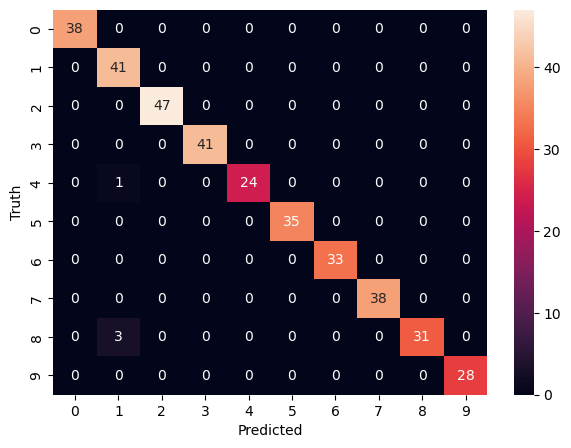

In [17]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.91      1.00      0.95        41
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        41
           4       1.00      0.96      0.98        25
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        38
           8       1.00      0.91      0.95        34
           9       1.00      1.00      1.00        28

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

